# TOPIC - CASE STUDY: ANALYSIS OF SUPERSTORE DATASET

# DONE BY FAISAL SHAMIM

Source of Dataset: https://www.kaggle.com/datasets/bravehart101/sample-supermarket-dataset

Importing the Libraries

In [39]:
import pandas as pd 
import plotly.express as px
from tabulate import tabulate
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

print("Libraries imported successfully")

Libraries imported successfully


Importing the Dataset

In [2]:
Superstore_data=pd.read_csv("superstore.csv")
print("Dataset imported successfully☑️")

Dataset imported successfully☑️


Peek at data

In [3]:
Superstore_data.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714


## Exploratory Data Analysis

Row and column Count of data

In [4]:
Superstore_data.shape

(9994, 21)

Columns name of dataset

In [5]:
columns=pd.DataFrame(Superstore_data.columns)
print(tabulate(columns,headers=["COLUMN NAMES"],tablefmt='presto'))

    | COLUMN NAMES
----+----------------
  0 | Row ID
  1 | Order ID
  2 | Order Date
  3 | Ship Date
  4 | Ship Mode
  5 | Customer ID
  6 | Customer Name
  7 | Segment
  8 | Country
  9 | City
 10 | State
 11 | Postal Code
 12 | Region
 13 | Product ID
 14 | Category
 15 | Sub-Category
 16 | Product Name
 17 | Sales
 18 | Quantity
 19 | Discount
 20 | Profit


Statistical representation

In [54]:
Superstore_data.describe()

,Order Date,Postal Code,Sales,Quantity,Discount,Profit,Day of Week
count,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,2016-04-30 00:07:12.259355648,55190.379428,229.858001,3.789574,0.156203,28.656896,3.206324
min,2014-01-03 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000,0.000000
25%,2015-05-23 00:00:00,23223.000000,17.280000,2.000000,0.000000,1.728750,1.000000
50%,2016-06-26 00:00:00,56430.500000,54.490000,3.000000,0.200000,8.666500,4.000000
75%,2017-05-14 00:00:00,90008.000000,209.940000,5.000000,0.200000,29.364000,5.000000
max,2017-12-30 00:00:00,99301.000000,22638.480000,14.000000,0.800000,8399.976000,6.000000
std,NaN,32063.693350,623.245101,2.225110,0.206452,234.260108,2.122925


Checking datatypes of columns

In [6]:
Superstore_data.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

Lets check if there is any missing values or not

In [7]:
Superstore_data.isnull().sum()

#NO missing values encountered

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

Row ID column is nothing but the serial number , so we can drop it 

In [8]:
Superstore_data=Superstore_data.drop("Row ID",axis=1)
Superstore_data.head(2)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820


Checking Country

In [9]:
Superstore_data['Country'].value_counts()

Country
United States    9994
Name: count, dtype: int64

As we can see data is for US Country only, so we can drop  the 'Country' column as we don't need any analysis to be done based on it

In [10]:
Superstore_data=Superstore_data.drop('Country',axis=1)
Superstore_data.head(1)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136


1️⃣PRODUCT LEVEL ANALYSIS


Lets begin with 

1️⃣PRODUCT LEVEL ANALYSIS


Let's see product categories available to shop

In [11]:
catgories=pd.DataFrame(Superstore_data['Category'].unique())
catgories

,0
0,Furniture
1,Office Supplies
2,Technology


Number of products in each category

In [12]:
product_count=pd.DataFrame(Superstore_data['Category'].value_counts())
print(tabulate(product_count,headers=["Categories","Product Count"],tablefmt="github"))

| Categories      |   Product Count |
|-----------------|-----------------|
| Office Supplies |            6026 |
| Furniture       |            2121 |
| Technology      |            1847 |


Number of Sub-Category product are divided

In [13]:
Superstore_data['Sub-Category'].nunique()

17

Number of product in each Sub-Category

In [14]:
Sub_Count=pd.DataFrame(Superstore_data['Sub-Category'].value_counts())
print(tabulate(Sub_Count,headers=["Sub-Category",'Count'],tablefmt='github'))

| Sub-Category   |   Count |
|----------------|---------|
| Binders        |    1523 |
| Paper          |    1370 |
| Furnishings    |     957 |
| Phones         |     889 |
| Storage        |     846 |
| Art            |     796 |
| Accessories    |     775 |
| Chairs         |     617 |
| Appliances     |     466 |
| Labels         |     364 |
| Tables         |     319 |
| Envelopes      |     254 |
| Bookcases      |     228 |
| Fasteners      |     217 |
| Supplies       |     190 |
| Machines       |     115 |
| Copiers        |      68 |


Let's see the distribution of sub category with respect to Category using nested bar chart or treemap

In [52]:
grouped_df = Superstore_data.groupby(['Category', 'Sub-Category']).size().reset_index(name='Count')

fig = px.treemap(grouped_df, path=['Category', 'Sub-Category'], values='Count', title='SuperStore Dataset Category vs Sub-Category',height=600,width=900)
fig.show()


From above chart, we concluded that the store has wide variety of Office Supplies especially in Binders and Paper department

In [16]:
# Create a stacked bar chart using Plotly
category_data = Superstore_data.groupby('Category')[['Sales', 'Profit']].sum().reset_index()
fig = px.bar(category_data, x='Category', y=['Sales', 'Profit'],
             title='Sales and Profit by Category', barmode='group',height=400,width=600)
fig.update_layout(xaxis_title='Category', yaxis_title='Amount')

# Show the interactive plot
fig.show()


There has been maximum sales and profirt from Technology Category

Sales vs Profit by Sub -Category

In [17]:
sub_category_data = Superstore_data.groupby('Sub-Category').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()

fig = px.bar(sub_category_data, x='Sub-Category', y=['Sales', 'Profit'], barmode='group')
fig.update_layout(title='Superstore Dataset: Sales vs Profit by Sub-Category', xaxis_title='Sub-Category', yaxis_title='Amount')
fig.show()


Insights 🔹

Highest profit is earned in Copiers while Selling price for Chairs and Phones is extremely high compared to other products.

Another interesting fact- people dont prefer to buy Tables and Bookcases from Superstore. Hence these departments are in loss.



Product available in store

In [18]:
Superstore_data['Product Name'].nunique()

1850

Their name and count

In [19]:
available_product=pd.DataFrame(Superstore_data['Product Name'].value_counts())
print(tabulate(available_product,headers=['Product name','Available count'],tablefmt='github'))

| Product name                                                                                                                    |   Available count |
|---------------------------------------------------------------------------------------------------------------------------------|-------------------|
| Staple envelope                                                                                                                 |                48 |
| Staples                                                                                                                         |                46 |
| Easy-staple paper                                                                                                               |                46 |
| Avery Non-Stick Binders                                                                                                         |                20 |
| Staples in misc. colors                                                               

Sub-Category ordered region wise

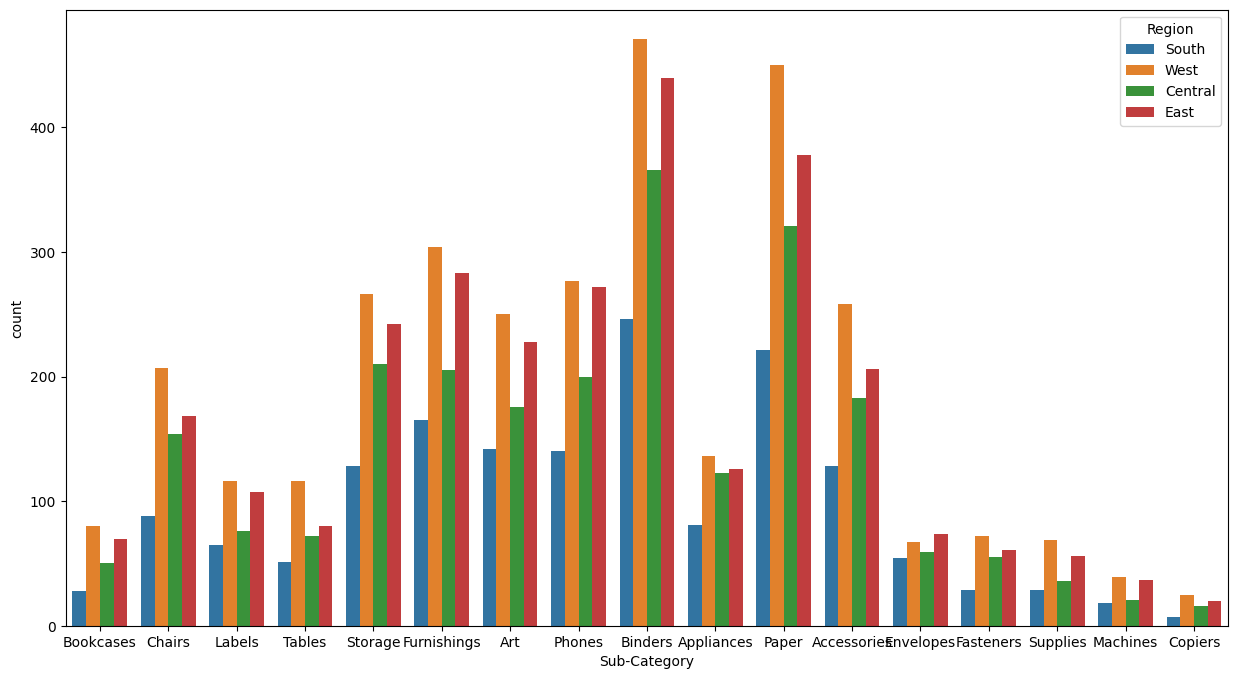

In [20]:
plt.figure(figsize=(15,8))
sns.countplot(x='Sub-Category',hue='Region',data=Superstore_data)
plt.show()

Insights 🔹

People living in Western region tend to order more from Superstore

In [21]:
Superstore_data.head(1)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136


In [22]:
Superstore_data['Product Name'].nunique()

1850

In [23]:
Superstore_data['Ship Date'].nunique()

1334

Which Customer segment is profitable?

In [46]:
segment_profit =Superstore_data.groupby('Segment')['Profit'].sum().sort_values(ascending=False)


In [47]:
 #visualization
bq2 = go.Figure(data=go.Bar(
    x=segment_profit,
    y=segment_profit.index,
    orientation='h'
))

# Customize the layout
bq2.update_layout(
    title='Profitability by Customer Segment',
    xaxis_title='Profit',
    yaxis_title='Customer Segment',
    height=400,
    width=600,

)

# Display the figure
bq2.show()

Insights 🔹
Consumer Segment has highest profit among other Segment

City Count by State

In [49]:
state_city_count = Superstore_data.groupby('State')['City'].nunique().reset_index()
state_city_count.columns = ['State', 'City_Count']

state_city_count

,State,City_Count
0,Alabama,8
1,Arizona,13
2,Arkansas,9
3,California,81
4,Colorado,16
5,Connecticut,10
6,Delaware,3
7,District of Columbia,1
8,Florida,36
9,Georgia,11


In [50]:
fig5 = px.bar(state_city_count, x='State', y='City_Count',height=400,width=900)
fig5.update_layout(title='City Count by State', xaxis_title='State', yaxis_title='City Count')
fig5.show()


Insights 🔹

Califronia has highest City Count

# Business Questions

Top Selling products region wise

In [24]:
top_products = Superstore_data.groupby('Region')['Sales'].idxmax()
top_products_df = Superstore_data.loc[top_products, ['Region', 'Product Name', 'Sales']]
top_products_df

,Region,Product Name,Sales
6826,Central,Canon imageCLASS 2200 Advanced Copier,17499.950
2623,East,Canon imageCLASS 2200 Advanced Copier,11199.968
2697,South,Cisco TelePresence System EX90 Videoconferenci...,22638.480
8153,West,Canon imageCLASS 2200 Advanced Copier,13999.960


In [25]:

fig = px.bar(top_products_df, x='Region', y='Sales', color='Product Name',
             title='Top-Selling Products by Region',height=600,width=900)
fig.update_layout(xaxis_title='Region', yaxis_title='Sales')



fig.show()


Which product our customer order most

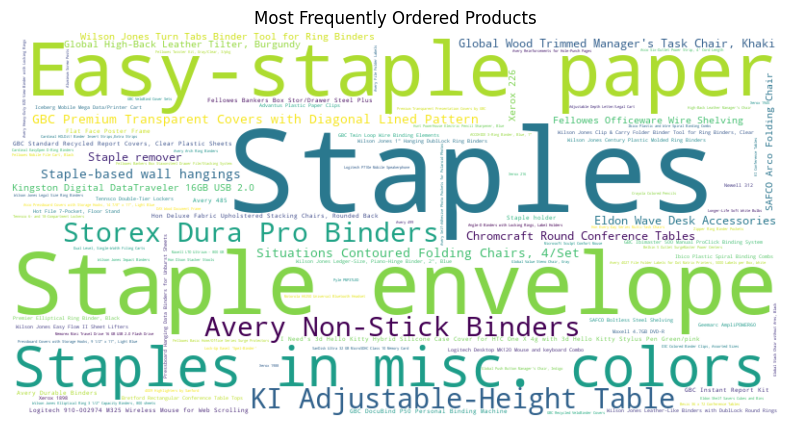

In [26]:

from wordcloud import WordCloud

# Assuming you have a DataFrame named 'df' with columns: Product, Quantity

# Group the data by product and calculate the total quantity ordered for each product
product_orders = Superstore_data.groupby('Product Name')['Quantity'].sum().reset_index()

# Create a dictionary of product names and their corresponding frequencies
product_freq = dict(zip(product_orders['Product Name'], product_orders['Quantity']))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(product_freq)

# Plot the word cloud
plt.figure(figsize=(15, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequently Ordered Products')

# Show the plot
plt.show()


Sales Trend by Order Date

In [27]:

Superstore_data['Order Date'] = pd.to_datetime(Superstore_data['Order Date'])

# Sort the DataFrame by order date in ascending order
df_sorted = Superstore_data.sort_values(by='Order Date')

# Create a line chart using Plotly
fig = px.line(df_sorted, x='Order Date', y='Sales', title='Sales Trend by Order Date',height=500,width=900)
fig.update_layout(xaxis_title='Order Date', yaxis_title='Sales')


fig.show()


Insights 🔹

The store recorded highest sales on March 18,2014

Who are the top 10 customers ?

In [28]:

customer_revenue = Superstore_data.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False)
df_customer_revenue = pd.DataFrame(customer_revenue).reset_index()
print(tabulate(df_customer_revenue[:10],headers=["Customer Name",'Revenue'],tablefmt='github'))

|    | Customer Name      |   Revenue |
|----|--------------------|-----------|
|  0 | Sean Miller        |   25043   |
|  1 | Tamara Chand       |   19052.2 |
|  2 | Raymond Buch       |   15117.3 |
|  3 | Tom Ashbrook       |   14595.6 |
|  4 | Adrian Barton      |   14473.6 |
|  5 | Ken Lonsdale       |   14175.2 |
|  6 | Sanjit Chand       |   14142.3 |
|  7 | Hunter Lopez       |   12873.3 |
|  8 | Sanjit Engle       |   12209.4 |
|  9 | Christopher Conant |   12129.1 |


In [29]:
import plotly.graph_objects as go
top_10_customers = customer_revenue[:10]

# Create the horizontal bar chart
fig = go.Figure(data=go.Bar(
    x=top_10_customers.values,
    y=top_10_customers.index,
    orientation='h'
))

# Customize the layout
fig.update_layout(
    title='Top 10 Customers by Revenue',
    xaxis_title='Revenue',
    yaxis_title='Customer Name',
    width=800,
    height=600,
)

# Display the figure
fig.show()


Insights 🔹

Sean Miller was the top-most customer

What was the Preferred Ship mode?

In [30]:
ship_modes_counts=pd.DataFrame(Superstore_data['Ship Mode'].value_counts())

print(tabulate(ship_modes_counts,headers=["Ship Mode","Count"],tablefmt='github'))

| Ship Mode      |   Count |
|----------------|---------|
| Standard Class |    5968 |
| Second Class   |    1945 |
| First Class    |    1538 |
| Same Day       |     543 |


In [53]:
ship_mode_counts = Superstore_data['Ship Mode'].value_counts()


# Create the pie chart
fig = go.Figure(data=go.Pie(
    labels=ship_mode_counts.index,
    values=ship_mode_counts.values,
    marker=dict(colors=['blue', 'green', 'orange', 'red']),
))

# Customize the layout
fig.update_layout(
    title='Preferred Ship Mode',
    height=500,
    width=800
)

# Display the chart
fig.show()


Insights 🔹

Standard Class was highly preferred among other Ship Modes

Sales vs Profit regionwise

In [32]:
region_sales_profit = Superstore_data.groupby('Region').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()
region_sales_profit

,Region,Sales,Profit
0,Central,501239.8908,39706.3625
1,East,678781.2400,91522.7800
2,South,391721.9050,46749.4303
3,West,725457.8245,108418.4489


In [33]:
fig6 = px.bar(region_sales_profit, x='Region', y=['Sales', 'Profit'], barmode='group')
fig6.update_layout(title='Sales vs Profit by Region', xaxis_title='Region', yaxis_title='Amount')
fig6.show()


Insights 🔹

Considering West region, Sales and Profit was high comparable to other regions

WHAT DAY OF WEEK WE RECIEVE MOST ORDERS?

In [34]:
# Convert the order date column to datetime
Superstore_data['Order Date'] = pd.to_datetime(Superstore_data['Order Date'])

# Extract the day of the week (Monday: 0, Sunday: 6)
Superstore_data['Day of Week'] = Superstore_data['Order Date'].dt.day_name()

# Group the data by day of the week and calculate order counts
order_counts = pd.DataFrame(Superstore_data['Day of Week'].value_counts().sort_index())
print(tabulate(order_counts,headers=['Day Name','Order Count']))

Day Name      Order Count
----------  -------------
Friday               1818
Monday               1871
Saturday             1655
Sunday               1710
Thursday             1463
Tuesday              1106
Wednesday             371


In [35]:

# Convert the order date column to datetime
Superstore_data['Order Date'] = pd.to_datetime(Superstore_data['Order Date'])

# Extract the day of the week (Monday: 0, Sunday: 6)
Superstore_data['Day of Week'] = Superstore_data['Order Date'].dt.weekday

# Group the data by day of the week and calculate order counts
order_counts = Superstore_data['Day of Week'].value_counts().sort_index()

# Create the bar chart using Plotly
fig = go.Figure(data=go.Bar(
    x=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'],
    y=order_counts.values,
    marker_color='#86608e',
))

# Customize the layout
fig.update_layout(
    title='Order Counts by Day of Week',
    xaxis_title='Day of Week',
    yaxis_title='Order Count',
    height=600,
    width=1000
)

# Display the chart
fig.show()


Insights 🔹

We recieve most orders on Monday

Wednesday was a low day for us